In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("worldHappinessData.csv")
print(df)

     rank                   country continent  score    GDP  social_support  \
0       1                   Finland    Europe  7.769  1.340           1.587   
1       2                   Denmark    Europe  7.600  1.383           1.573   
2       3                    Norway    Europe  7.554  1.488           1.582   
3       4                   Iceland    Europe  7.494  1.380           1.624   
4       5               Netherlands    Europe  7.488  1.396           1.522   
..    ...                       ...       ...    ...    ...             ...   
151   152                    Rwanda    Africa  3.334  0.359           0.711   
152   153                  Tanzania    Africa  3.231  0.476           0.885   
153   154               Afghanistan      Asia  3.203  0.350           0.517   
154   155  Central African Republic    Africa  3.083  0.026           0.000   
155   156               South Sudan    Africa  2.853  0.306           0.575   

     healthy_life_expectancy  life_choices_freedom 

In [14]:
print(round(df.describe(), 1)) #round to 1 decimal place
#print(df.info())

        rank  score    GDP  social_support  healthy_life_expectancy  \
count  156.0  156.0  156.0           156.0                    156.0   
mean    78.5    5.4    0.9             1.2                      0.7   
std     45.2    1.1    0.4             0.3                      0.2   
min      1.0    2.9    0.0             0.0                      0.0   
25%     39.8    4.5    0.6             1.1                      0.5   
50%     78.5    5.4    1.0             1.3                      0.8   
75%    117.2    6.2    1.2             1.5                      0.9   
max    156.0    7.8    1.7             1.6                      1.1   

       life_choices_freedom  generosity  perceptions_of_corruption  
count                 156.0       156.0                      156.0  
mean                    0.4         0.2                        0.1  
std                     0.1         0.1                        0.1  
min                     0.0         0.0                        0.0  
25%            

In [10]:
print(df.head(5)) #prints first 5 inputs
#print(df.tail(5))

   rank      country continent  score    GDP  social_support  \
0     1      Finland    Europe  7.769  1.340           1.587   
1     2      Denmark    Europe  7.600  1.383           1.573   
2     3       Norway    Europe  7.554  1.488           1.582   
3     4      Iceland    Europe  7.494  1.380           1.624   
4     5  Netherlands    Europe  7.488  1.396           1.522   

   healthy_life_expectancy  life_choices_freedom  generosity  \
0                    0.986                 0.596       0.153   
1                    0.996                 0.592       0.252   
2                    1.028                 0.603       0.271   
3                    1.026                 0.591       0.354   
4                    0.999                 0.557       0.322   

   perceptions_of_corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298  


In [11]:
print(df["generosity"])

0      0.153
1      0.252
2      0.271
3      0.354
4      0.322
       ...  
151    0.217
152    0.276
153    0.158
154    0.235
155    0.202
Name: generosity, Length: 156, dtype: float64


In [12]:
#Creating a new column
df["support_to_life_expectancy"] = df["healthy_life_expectancy"] / df["social_support"]
print(df["support_to_life_expectancy"])

0      0.621298
1      0.633185
2      0.649810
3      0.631773
4      0.656373
         ...   
151    0.863572
152    0.563842
153    0.698259
154         inf
155    0.513043
Name: support_to_life_expectancy, Length: 156, dtype: float64


In [15]:
print(df[["country", "GDP"]])

                      country    GDP
0                     Finland  1.340
1                     Denmark  1.383
2                      Norway  1.488
3                     Iceland  1.380
4                 Netherlands  1.396
..                        ...    ...
151                    Rwanda  0.359
152                  Tanzania  0.476
153               Afghanistan  0.350
154  Central African Republic  0.026
155               South Sudan  0.306

[156 rows x 2 columns]


In [22]:
#print(df.iloc[0:2, 3:7]) #integer location (specify rows and columns)
#print(df.iloc[4])
print(df.iloc[[2, 4, 6], [0, 5]])
print(df.loc[df["country"] == "Ghana"]) #location

   rank  social_support
2     3           1.582
4     5           1.522
6     7           1.487
    rank country continent  score    GDP  social_support  \
97    98   Ghana    Africa  4.996  0.611           0.868   

    healthy_life_expectancy  life_choices_freedom  generosity  \
97                    0.486                 0.381       0.245   

    perceptions_of_corruption  
97                       0.04  


In [23]:
print(df.loc[df["score"] > 7, ["country", "score"]])

           country  score
0          Finland  7.769
1          Denmark  7.600
2           Norway  7.554
3          Iceland  7.494
4      Netherlands  7.488
5      Switzerland  7.480
6           Sweden  7.343
7      New Zealand  7.307
8           Canada  7.278
9          Austria  7.246
10       Australia  7.228
11      Costa Rica  7.167
12          Israel  7.139
13      Luxembourg  7.090
14  United Kingdom  7.054
15         Ireland  7.021


In [24]:
df1 = df.groupby("continent").sum()
print(df1)

               rank    score     GDP  social_support  healthy_life_expectancy  \
continent                                                                       
Africa         5384  192.039  22.051          41.122                   19.626   
Asia           3844  242.499  45.093          55.214                   35.239   
Europe         1774  250.687  48.796          57.209                   36.874   
North America   579   80.011  12.381          17.284                   10.617   
Oceania         137   19.069   3.055           3.934                    2.437   
South America   528   59.202   9.827          13.812                    8.345   

               life_choices_freedom  generosity  perceptions_of_corruption  
continent                                                                   
Africa                       14.490       7.679                      4.158  
Asia                         18.818       9.730                      5.083  
Europe                       16.162       6

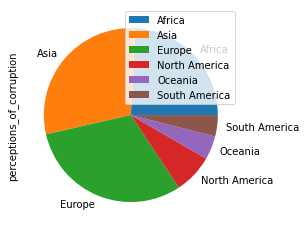

In [25]:
df1.plot.pie(y="perceptions_of_corruption", labels=df1.index)
plt.show()